# Abstract:

#### Objective:

- The objective is to find wether the employee will come under attrition

# Importing Libraries and Datasets

In [46]:
#importing ibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warning
import warnings
warnings.filterwarnings("ignore")


In [47]:
#read the csv file
hr = pd.read_csv("HR-Employee-Attrition.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [48]:
#examine the information 
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [49]:
#display the column names
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [50]:
#display the shape of hr dataset
hr.shape

(1470, 35)

 #### There are 1470 rows and 35 columns

# Identifying The Type of Problem(Regression/Classification)

In [51]:
#examine the data type of columns
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### observation:
- There are 9 categorical column and 26 numerical columns

In [52]:
hr_columns = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for value in hr_columns:
    print(hr[value].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

### Observation :

   ###### Age - Qualitative data type, Ordinal
   ###### Attrition - Qualitative , Nominal
   ###### BusinessTravel - Qualitative , Nominal
   ###### DailyRate - Quantitative , continuous
   ###### Department - Qualitative , Nominal
   ###### DistanceFromHome- Quantitative , discrete
   ###### Education- Qualitative , Nominal
   ###### EducationField - Qualitative , Nominal
   ###### EmployeeCount - Qualitative , Nominal
   ###### EmployeeNumber - Qualitative , Nominal
   ###### EnvironmentSatisfaction - Qualitative , Nominal
   ###### Gender - Qualitative , Nominal
   ###### HourlyRate - Quantitative , continuous
   ###### JobInvolvement - Qualitative , Nominal
   ###### JobLevel - Qualitative , Nominal
   ###### JobRole - Qualitative data type, Ordinal
   ###### JobSatisfaction - Qualitative data type, Ordinal
   ###### MaritalStatus - Qualitative , Nominal
   ###### MonthlyIncome - Quantitative , continuous
   ###### MonthlyRate - Quantitative , continuous 
   ###### NumCompaniesWorked - Qualitative , Nominal
   ###### Over18 - Qualitative , Nominal
   ###### OverTime - Qualitative , Nominal
   ###### PercentSalaryHike - Quantitative , discrete
   ###### PerformanceRating - Qualitative data type, Ordinal
   ###### RelationshipSatisfaction - Qualitative data type, Ordinal
   ###### StandardHours - Qualitative , Nominal
   ###### StockOptionLevel - Qualitative , Nominal
   ###### TotalWorkingYears - Qualitative , Nominal
   ###### TrainingTimesLastYear - Qualitative , Nominal
   ###### WorkLifeBalance - Qualitative , Nominal
   ###### YearsAtCompany - Qualitative , Nominal
   ###### YearsInCurrentRole - Qualitative , Nominal
   ###### YearsSinceLastPromotion - Qualitative , Nominal
   ###### YearsWithCurrManager - Qualitative , Nominal
  
   

##### Observation:
 - The Target column is "Attrition"
     - which is Qualitative, Nominal datatype therefore we can choose the type to be Classification
#### Supervised/Classification        
    - Metrics: 
         - accuracy score, confusion matrix, classification report, AUC/ROC curve

# Exploratory Data Analysis & Data Cleaning

#### Spliting the categorical and numerical values for better visuvalizaion

In [53]:
cat_hr = hr[["Attrition", "BusinessTravel", 'Department', 'EducationField',  'Gender', 'JobRole', 'MaritalStatus',  'Over18', 'OverTime']].copy()


In [54]:
#Analyse the first 5 records
cat_hr.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


##### Univariate analysis 

Text(0.5, 1.0, 'Attrition count')

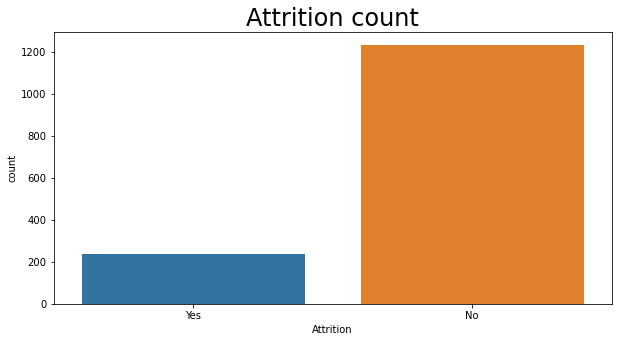

In [55]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="Attrition")
#plt.xticks(rotation=90)
plt.title("Attrition count", fontsize = 24)

### Observation:
- No has the highest count, hence the company does not reduce workforce if it is not absolutely neccesary

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

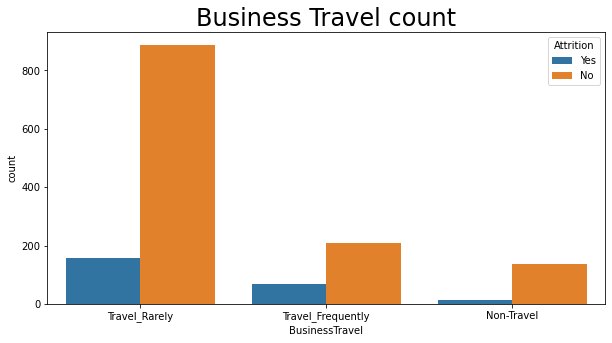

In [56]:
#count plot for categorical variable BusinessTravel
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="BusinessTravel", hue="Attrition")
#plt.xticks(rotation=90)
plt.title("Business Travel count", fontsize = 24)
hr["BusinessTravel"].value_counts()

# Observation:

- Attrition: No
    - Travels rarely has the Highest Low attrition count
    - non-travel has the Highest Low  attrition count
- Attrition : yes
    - Travels Rarely has the highest attrition count
    

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

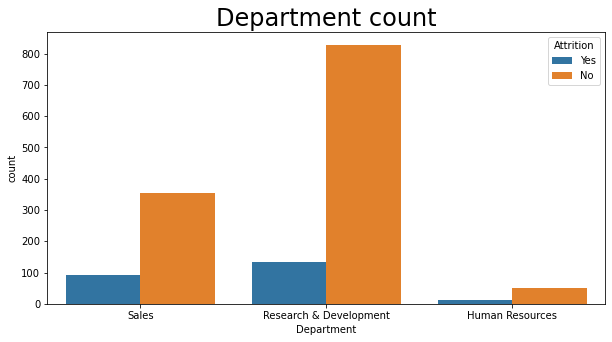

In [57]:
#count plot for categorical variable Department
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="Department", hue = "Attrition")
#plt.xticks(rotation=90)
plt.title("Department count", fontsize = 24)
hr["Department"].value_counts()

### Observation:
- Highest 'no' attrition count for Research and development
- Human resource has lowest 'yes' as well as 'no' attrition count

Text(0.5, 1.0, 'Education Field count')

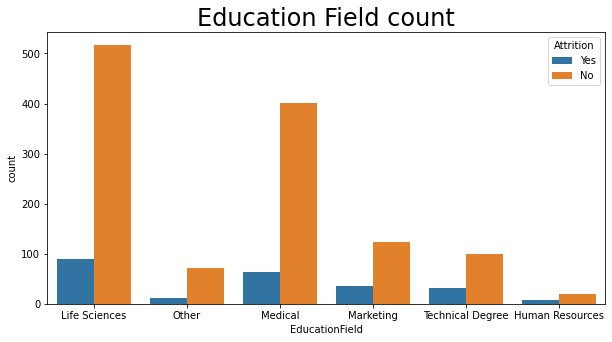

In [58]:
#count plot for categorical variable Education Field
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="EducationField", hue="Attrition")
#plt.xticks(rotation=90)````
plt.title("Education Field count", fontsize = 24)

### Observation:
- Life science has the highest "No" attrition count 
- Medical is the second highest with "No" attrition count
- Other are more similar to each other with high "No" attrition count
- Human Resource is the last on the line 

Male      882
Female    588
Name: Gender, dtype: int64

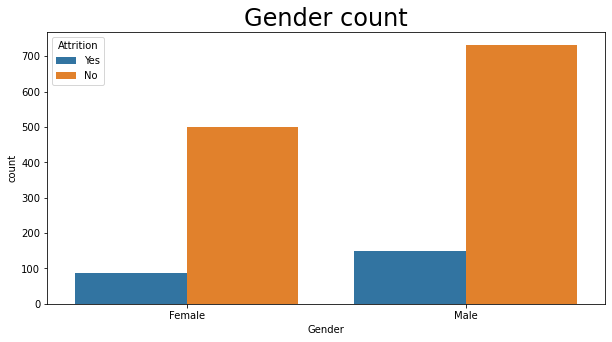

In [59]:
#count plot for categorical variable Gender
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="Gender", hue="Attrition")
#plt.xticks(rotation=90)
plt.title("Gender count", fontsize = 24)
hr["Gender"].value_counts()

### Observation:
- Male employee have the highest "Yes" attrition compared to women.
- The overall count of male employees is greater than female employees

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

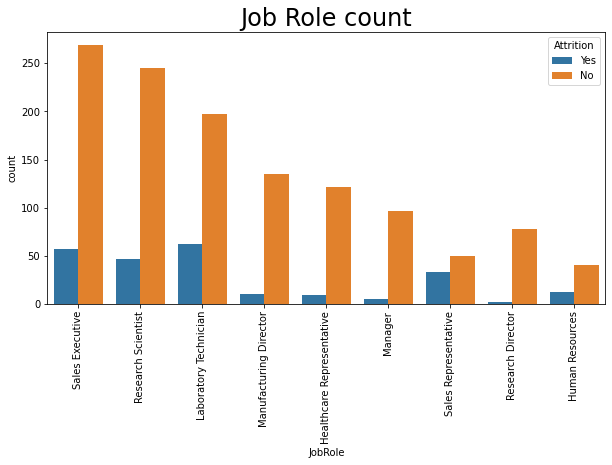

In [60]:
#count plot for categorical variable Job Role
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="JobRole", hue="Attrition")
plt.xticks(rotation=90)
plt.title("Job Role count", fontsize = 24)
cat_hr["JobRole"].value_counts()

### Observations:

- Laboratory Technitian has the highest "yes" attrition count out  of all the job roles.
- Followed by, Sales Execuives who have second highest " yes " attrition count.
- Research Directors have the lowest "yes" attrition count
- Sales executives are not often classifed for attrition

Text(0.5, 1.0, 'Marital Status count')

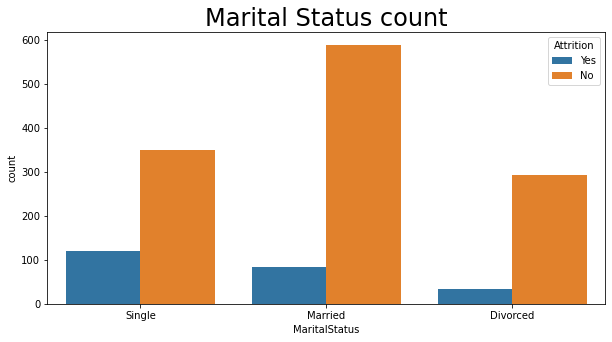

In [61]:
#count plot for categorical variable Gender
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="MaritalStatus", hue="Attrition")
#plt.xticks(rotation=90)
plt.title("Marital Status count", fontsize = 24)

### Observations:

- Employee with marital status as single have a highest "yes" attrition count.
- Employee with marital status as Divorced have a lowest "yes" atrition count.
- Married people are not ofent put under attrition.

Text(0.5, 1.0, 'Over Time count')

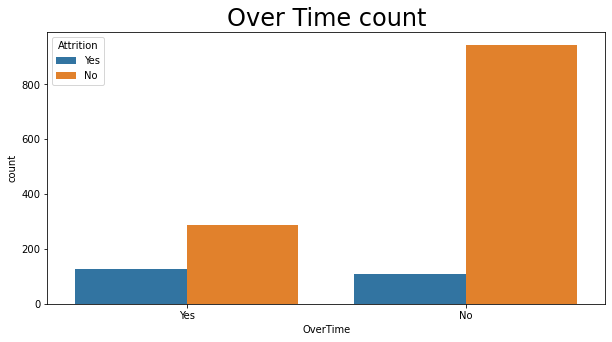

In [62]:
#count plot for categorical variable Gender
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="OverTime", hue="Attrition")
#plt.xticks(rotation=90)
plt.title("Over Time count", fontsize = 24)

### Observation:

- people who work overtime are generally very less in number and most of these employees are not classified under attrition

In [63]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Bivariate analysis

In [64]:
# analysising quantitative variables
qant_hr = hr[["DailyRate", "MonthlyIncome", "DistanceFromHome", "HourlyRate","MonthlyRate","PercentSalaryHike", "Attrition"]].copy()

In [65]:
qant_hr.head()

,DailyRate,MonthlyIncome,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,Attrition
0,1102,5993,1,94,19479,11,Yes
1,279,5130,8,61,24907,23,No
2,1373,2090,2,92,2396,15,Yes
3,1392,2909,3,56,23159,11,No
4,591,3468,2,40,16632,12,No


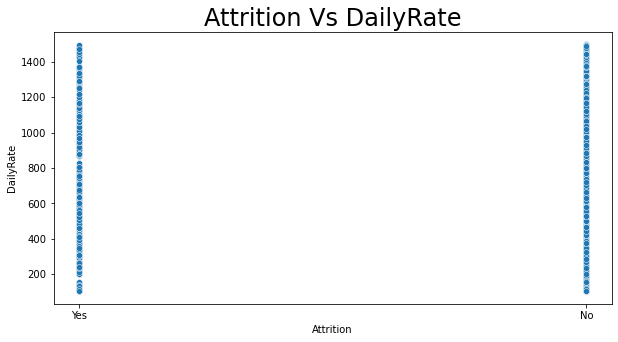

In [66]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs DailyRate", fontsize=24)
sns.scatterplot(x="Attrition", y="DailyRate", data=qant_hr)

- The Daily rate of salary for employee is the same for both employees who are classified to be under attrition as well as to be not under attrition.

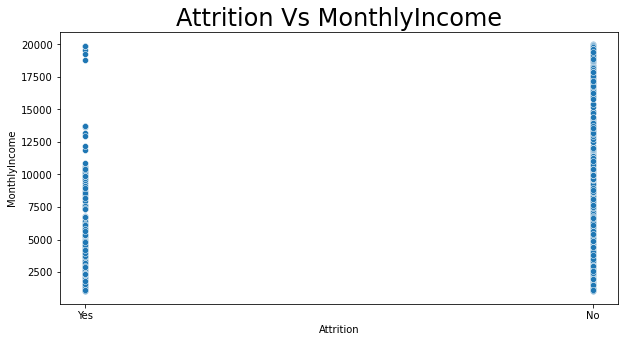

In [67]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs MonthlyIncome", fontsize=24)
sns.scatterplot(x="Attrition", y="MonthlyIncome", data=qant_hr)

- Employee with monhtly income of more than 13,000$ and within 18,000$ are not classified under attrition

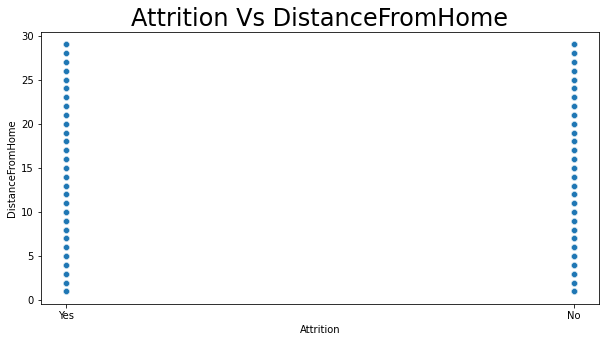

In [68]:
#plot to find relationship.
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs DistanceFromHome", fontsize=24)
sns.scatterplot(x="Attrition", y="DistanceFromHome", data=qant_hr)

- Distance from Home does not differentiate or classifiy attrtion possiblity.

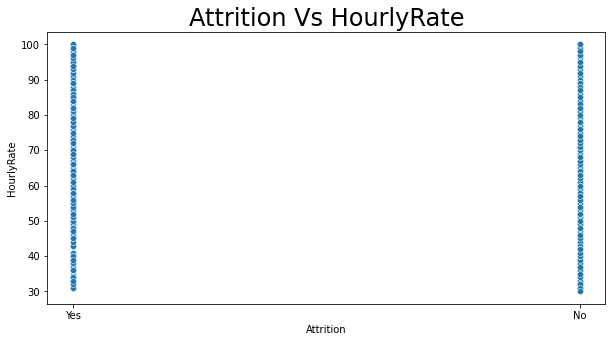

In [69]:
#plot to find relationship.
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs HourlyRate", fontsize=24)
sns.scatterplot(x="Attrition", y="HourlyRate", data=qant_hr)

- Employee Hourly rate does not differentiate or classifiy attrtion possiblity.

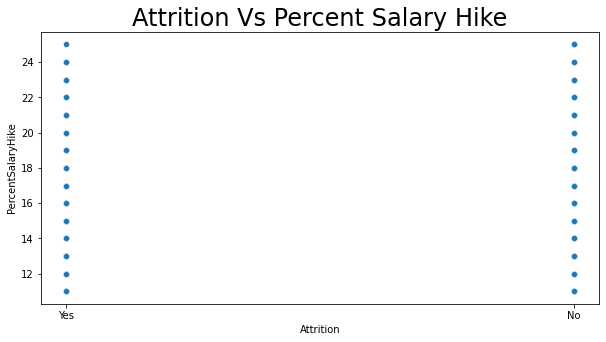

In [70]:
#plot to find relationship.
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs Percent Salary Hike", fontsize=24)
sns.scatterplot(x="Attrition", y="PercentSalaryHike", data=qant_hr)

- Employee pecentage of salary hike does not differentiate or classifiy attrtion possiblity.

In [71]:
#discrete values 

In [72]:
quali_hr = hr[['Age', 'Attrition', 'Education','EmployeeCount' ,
       'EmployeeNumber', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel',  'JobSatisfaction','NumCompaniesWorked',
       'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].copy()

In [73]:
quali_hr.head()

,Age,Attrition,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1,1,2,3,2,4,8,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,1,2,3,2,2,2,1,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1,4,4,2,1,3,6,...,2,80,0,7,3,3,0,0,0,0
3,33,No,4,1,5,4,3,1,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,1,7,1,3,1,2,9,...,4,80,1,6,3,3,2,2,2,2


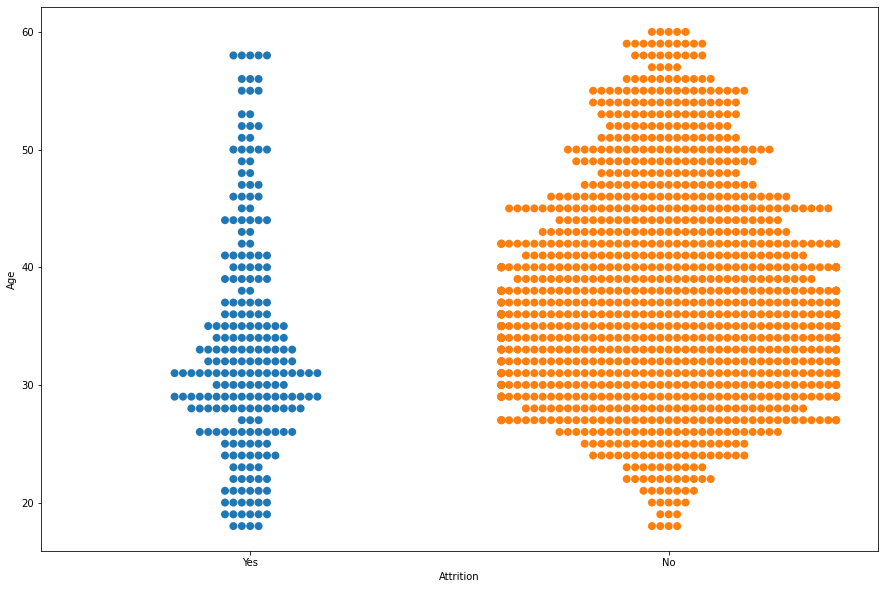

In [74]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.swarmplot(x="Attrition", y="Age", data=quali_hr, size=8)
plt.show()

### Observation:

- The age group between 25 to 40 have higher possiblity of not being classified under attrition
- the age group above 55 have higher possibility of being under attrition.

##### group analysis

In [75]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Label Encoding

In [76]:
cat_hr.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [77]:
cat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

for val in cat:
    cat_hr[val] = LE.fit_transform(cat_hr[val])
    

In [78]:
cat_hr

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,0
1466,0,2,1,3,1,0,1,0,0
1467,0,2,1,1,1,4,1,0,1
1468,0,1,2,3,1,7,1,0,0


In [79]:
for val in cat:
    print(cat_hr[val].unique())

[1 0]
[2 1 0]
[2 1 0]
[1 4 3 2 5 0]
[0 1]
[7 6 2 4 0 3 8 5 1]
[2 1 0]
[0]
[1 0]


In [80]:
for val in cat:
    hr = hr.drop(val, axis=1)

In [81]:
hr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [82]:
cat_hr

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,0
1466,0,2,1,3,1,0,1,0,0
1467,0,2,1,1,1,4,1,0,1
1468,0,1,2,3,1,7,1,0,0


In [83]:
new_hr = pd.concat([hr,cat_hr], axis=1, join="inner")

In [84]:
#concatinating hr and cat_hr after label encoding
new_hr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


In [85]:
new_hr.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Attrition                   int32
BusinessTravel              int32
Department                  int32
EducationField

- All the columns are numerical

### Multivariate analysis

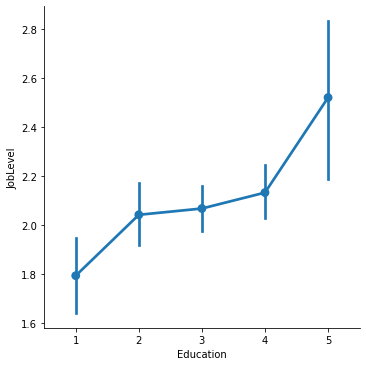

In [86]:
sns.catplot(x="Education", y="JobLevel", kind="point", split=True, data=new_hr)

- Education increase job level increases:
    - 1 : 1.8 is the mean
    - 2 : 2.0 is the mean
    - 3 : 2.0 is the mean
    - 4 : 2.1 is the mean
    - 5 has a wider spread between 2.2 to 2.8 where 2.5 is the mean

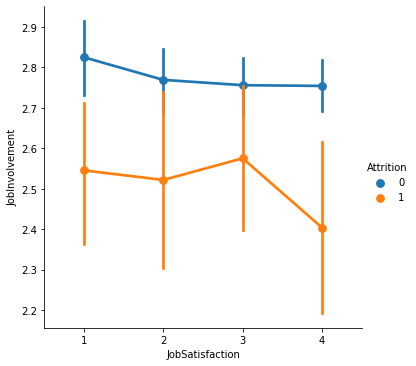

In [87]:
sns.catplot(x="JobSatisfaction", y="JobInvolvement", hue="Attrition", kind="point", split=True, data=new_hr)

### Observation:

 - When job involvement is more than 2.7 and job satisfaction is 1 the employee will be classfied under "yes" for attrition
 - When job involvement is more than 2.8 and job satisfaction is 2 the employee will be classfied under "yes" for attrition
 - When job involvement is more than 2.8 and job satisfaction is 3 the employee will be classfied under "yes" for attrition
 - When job involvement is more than 2.7 and job satisfaction is 4 the employee will be classfied under "yes" for attrition

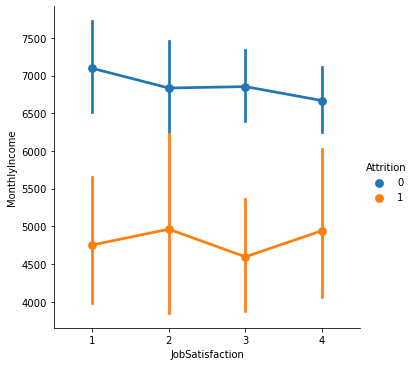

In [88]:
sns.catplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition", kind="point", split=True, data=new_hr)

### Observation:

- When the monthly income is more than 6500 or 7500 and job satisfaction is 1 the employee is considered for attrition.
- When the monthly income is more than 6000 to 7500 and the job satifaction is 2 the employee is considered for attrition.
- When the monthly income is more than 6500 and less than 7300 and the job satisfaction is 3 the employees is considered for attrition.
- When the monthly income is more tham 6300 and less than 7300 and the job satisfaction is 4 the employee is considered for attrition.
- 

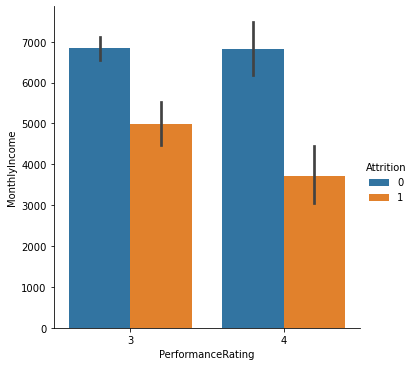

In [89]:
sns.catplot(x="PerformanceRating", y="MonthlyIncome", hue="Attrition", kind="bar", data=new_hr)

### observation

- The performance rating is 3 and mothnly income with mean of 6500 are considered for attrition
- The performance rating is 4 and monthly income with mean of 6000 are considered for attrition

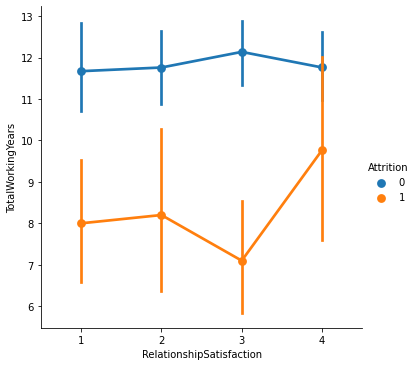

In [91]:
sns.catplot(x="RelationshipSatisfaction", y="TotalWorkingYears", hue="Attrition", kind="point", split=True, data=new_hr)

### Observation
 
    - The employee with high relationship satisfaction and high working years, are not considered for attrition. yet when they reach a period os 12.5 years they might be considered for attritionm

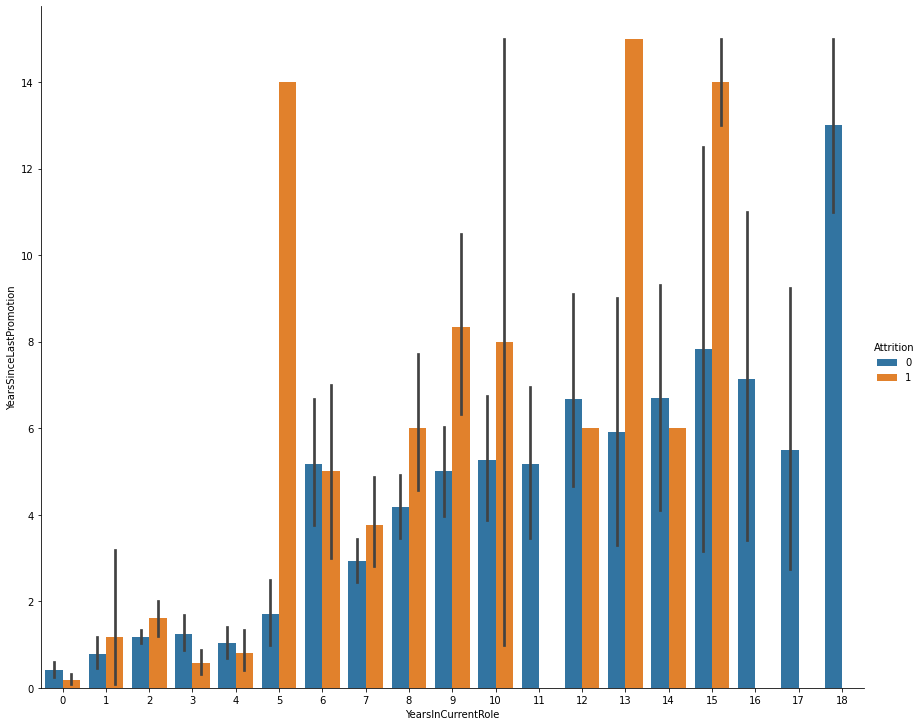

In [92]:
sns.catplot(x="YearsInCurrentRole", y="YearsSinceLastPromotion", hue="Attrition", kind="bar", data=new_hr, height=10, aspect=12/10)
plt.show()

### Observation:

- The people in the same role for 17 and 18 years are considered for attrition.


#### grouping

In [93]:
new_hr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [94]:
new =['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']

In [95]:
for val in new:
    print(new_hr.groupby("Attrition")[val].median())
    print("\n")

Attrition
0    36
1    32
Name: Age, dtype: int64


Attrition
0    817
1    699
Name: DailyRate, dtype: int64


Attrition
0    7
1    9
Name: DistanceFromHome, dtype: int64


Attrition
0    3
1    3
Name: Education, dtype: int64


Attrition
0    1
1    1
Name: EmployeeCount, dtype: int64


Attrition
0    1022
1    1017
Name: EmployeeNumber, dtype: int64


Attrition
0    3
1    3
Name: EnvironmentSatisfaction, dtype: int64


Attrition
0    66
1    66
Name: HourlyRate, dtype: int64


Attrition
0    3
1    3
Name: JobInvolvement, dtype: int64


Attrition
0    2
1    1
Name: JobLevel, dtype: int64


Attrition
0    3
1    3
Name: JobSatisfaction, dtype: int64


Attrition
0    5204
1    3202
Name: MonthlyIncome, dtype: int64


Attrition
0    14120
1    14618
Name: MonthlyRate, dtype: int64


Attrition
0    2
1    1
Name: NumCompaniesWorked, dtype: int64


Attrition
0    14
1    14
Name: PercentSalaryHike, dtype: int64


Attrition
0    3
1    3
Name: PerformanceRating, dtype: int64


Attritio

### Observation:

- Grouping is usefull to idetify the possible relationship of quantitative variable with target variable
- Dialy Rate :  employee classified under attrtion have high dialy rate
- Monthly Income: employee with high income are considered for attrition
- Monthly Rate : Monthly rate is not a good quantitative factor to decide which employee will be under attrition.
- Total working Yeats : employee with many working years are considered for attrition (more than 10 years)
- Years At company : Employee with more year in the company (more than 6 years) are considered for attrition.

In [96]:
new_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,4.123129,0.161224,1.607483,1.260544,2.247619,0.600000,4.458503,1.097279,0.0,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,3.568136,0.367863,0.665455,0.527792,1.331369,0.490065,2.461821,0.730121,0.0,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.0,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,0.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.0,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,7.000000,0.000000,2.000000,2.000000,3.000000,1.000000,7.000000,2.000000,0.0,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,17.000000,1.000000,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,0.0,1.000000


- There are 35 columns and it is hard to find difference bwetween mean and standard deviation or to find the range for all columns. But considering the available data there are column with high standard devaition and huge difference in the range

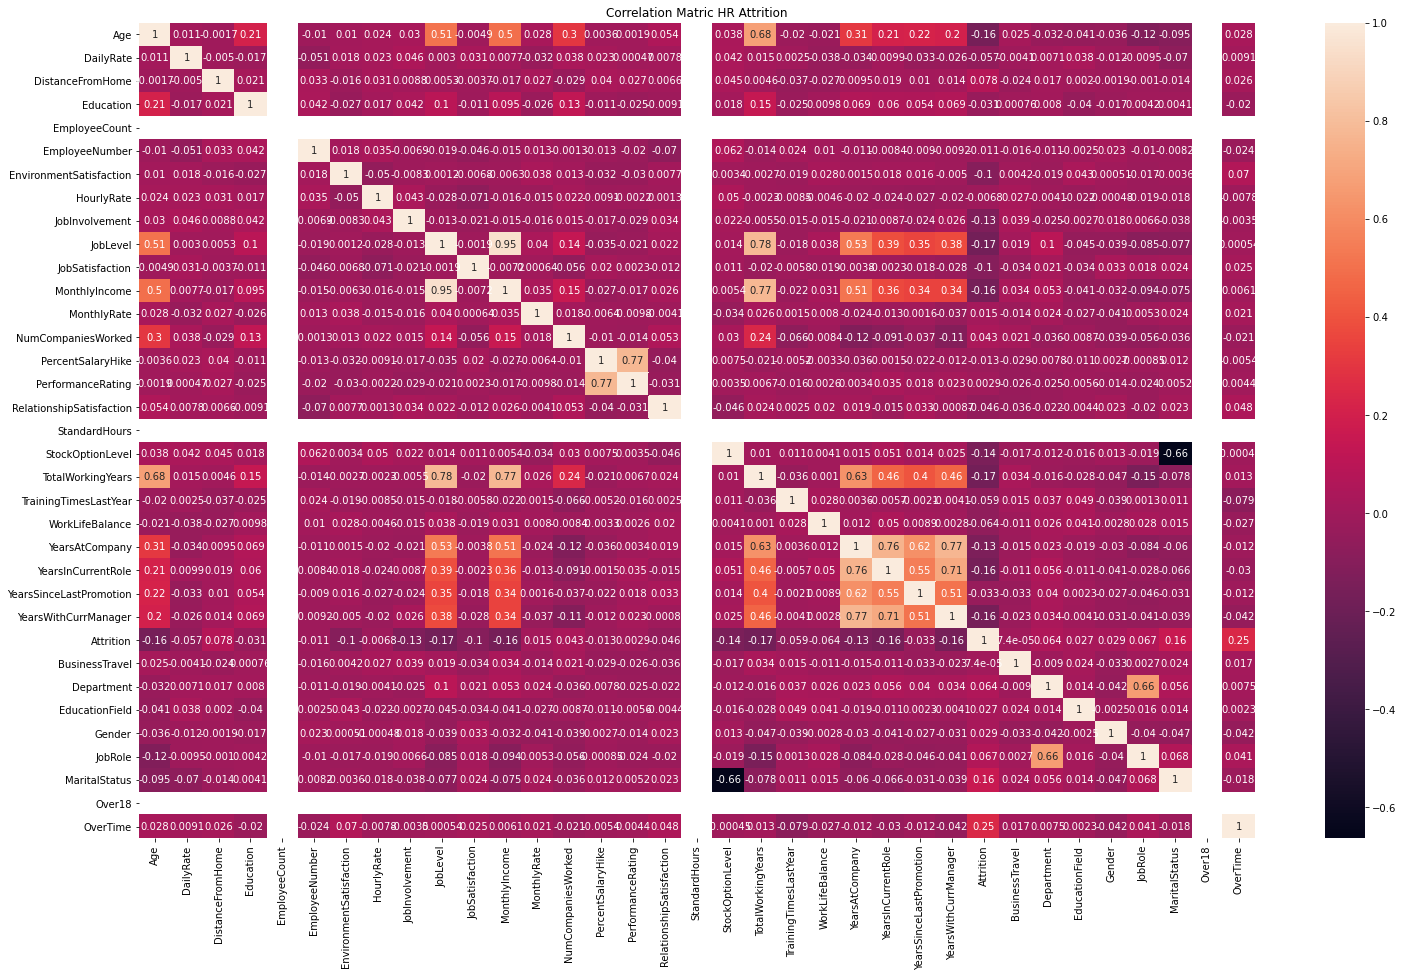

In [97]:
correlation = new_hr.corr()
plt.figure(figsize = [25,15])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric HR Attrition")
plt.show()

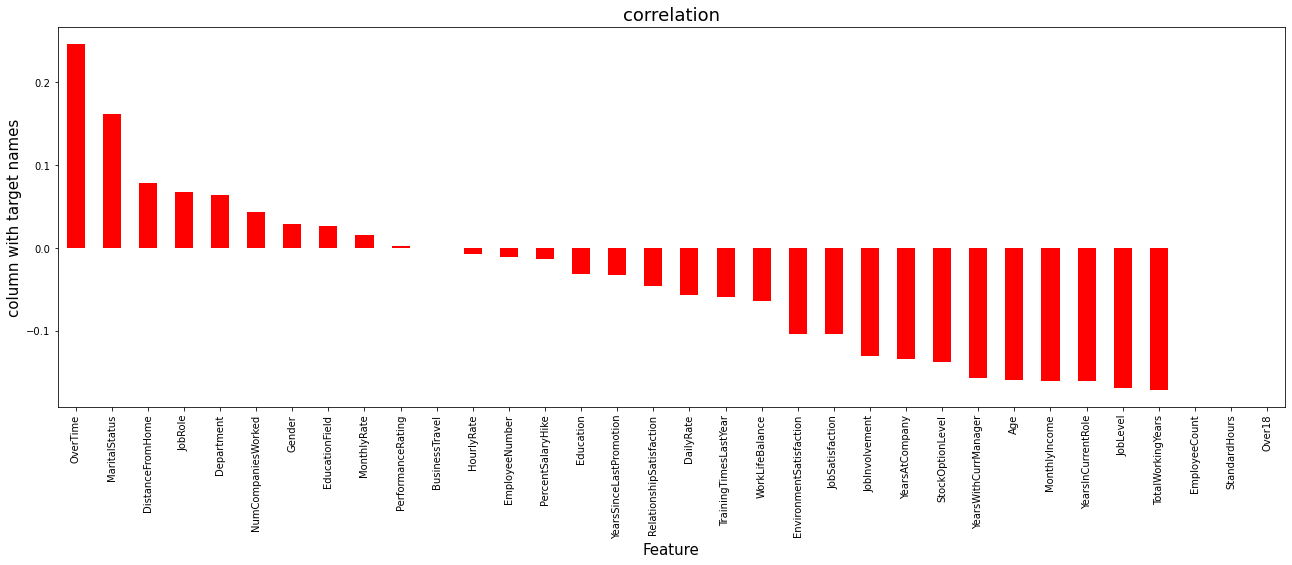

In [98]:
#Arrange feature according to correlation to target variables.
plt.figure(figsize=(22,7))
new_hr.corr()["Attrition"].sort_values(ascending = False).drop(["Attrition"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

 ### Observation:
   - "BusinessTravel","EmployeeCount","StandardHours","Over18" has no corrlation with the target column.
   - They can be dropped to increase the prefomance of the model

In [99]:
correlation["Attrition"].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

#### dropping column

In [100]:
dictdata = {"column_name": ["BusinessTravel","EmployeeCount","StandardHours","Over18", "EmployeeNumber"],
            "Correlation _with_target":[0.000074, "NaN", "NaN", "NaN", -0.0105],
            
           }
drop_df = pd.DataFrame(dictdata)

In [101]:
drop_df

,column_name,Correlation _with_target
0,BusinessTravel,7.4e-05
1,EmployeeCount,NaN
2,StandardHours,NaN
3,Over18,NaN
4,EmployeeNumber,-0.0105


In [102]:
drop_col = ["BusinessTravel","EmployeeCount","StandardHours","Over18","EmployeeNumber"]
for val in drop_col:
    new_hr = new_hr.drop(val, axis=1)

In [103]:
new_hr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,4,0,5,1,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,7,1,7,0,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,1,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,7,3,0,0,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,2,0,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,2,0,3,0,1,3,1,2,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,7,1,7,0,1,3,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,2,0,3,0,1,1,1,4,1,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,6,0,8,0,2,3,1,7,1,0


In [105]:
new_hr.shape

(1470, 30)

- Columns dropped

# Checking For Skewness and Removal

### Normal Distribution Check

In [106]:
qant_hr.columns

Index(['DailyRate', 'MonthlyIncome', 'DistanceFromHome', 'HourlyRate',
       'MonthlyRate', 'PercentSalaryHike', 'Attrition'],
      dtype='object')

In [107]:
quant_column = ['DailyRate', 'MonthlyIncome', 'DistanceFromHome', 'HourlyRate',
       'MonthlyRate', 'PercentSalaryHike']

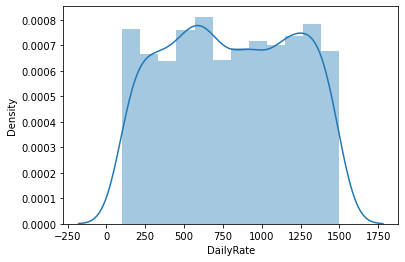

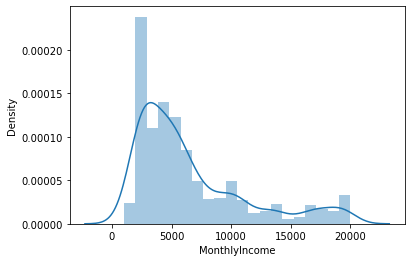

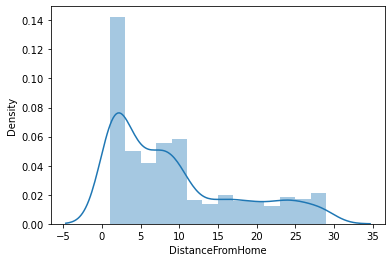

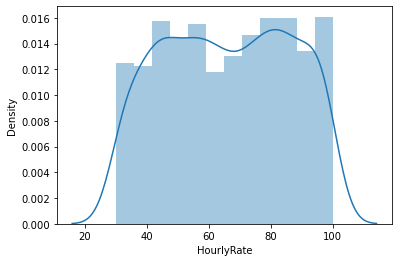

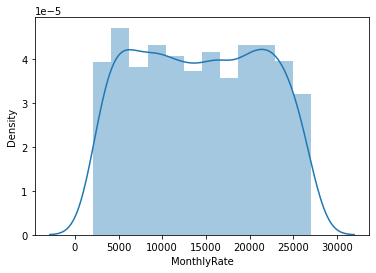

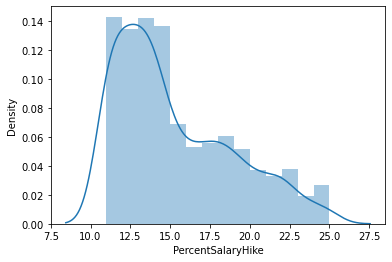

In [108]:
for val in quant_column:
    sns.distplot(qant_hr[val], kde=True)
    plt.show()

In [109]:
qant_hr = qant_hr.drop("Attrition", axis = 1)

In [110]:
qant_hr.skew()

DailyRate           -0.003519
MonthlyIncome        1.369817
DistanceFromHome     0.958118
HourlyRate          -0.032311
MonthlyRate          0.018578
PercentSalaryHike    0.821128
dtype: float64

- skeness in monthly income and distance from home

In [111]:
from scipy.stats import boxcox
qant_hr["MonthlyIncome"] = boxcox(qant_hr["MonthlyIncome"],0)

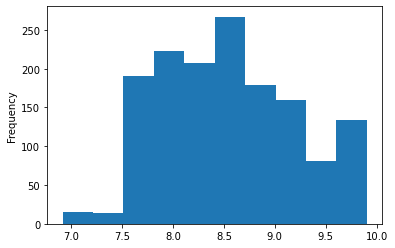

In [112]:
qant_hr["MonthlyIncome"].plot.hist()

In [113]:
qant_hr.skew()

DailyRate           -0.003519
MonthlyIncome        0.286192
DistanceFromHome     0.958118
HourlyRate          -0.032311
MonthlyRate          0.018578
PercentSalaryHike    0.821128
dtype: float64

In [114]:
qant_hr["DailyRate"] = boxcox(qant_hr["DailyRate"],0)

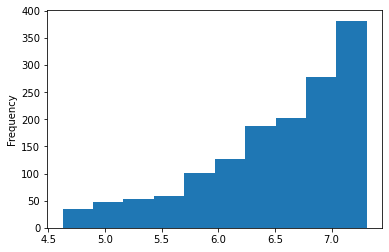

In [115]:
qant_hr["DailyRate"].plot.hist()

In [116]:
qant_hr.skew()

DailyRate           -0.927176
MonthlyIncome        0.286192
DistanceFromHome     0.958118
HourlyRate          -0.032311
MonthlyRate          0.018578
PercentSalaryHike    0.821128
dtype: float64

In [117]:
qant_hr["MonthlyRate"] = boxcox(qant_hr["MonthlyRate"],0)
qant_hr["PercentSalaryHike"] = boxcox(qant_hr["PercentSalaryHike"],0)

In [118]:
qant_hr.skew()

DailyRate           -0.927176
MonthlyIncome        0.286192
DistanceFromHome     0.958118
HourlyRate          -0.032311
MonthlyRate         -0.815685
PercentSalaryHike    0.494566
dtype: float64

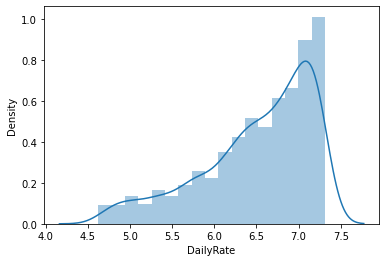

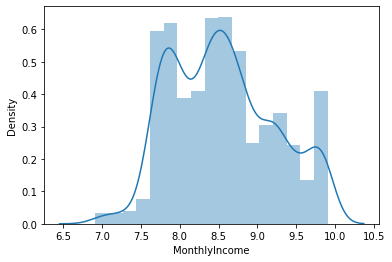

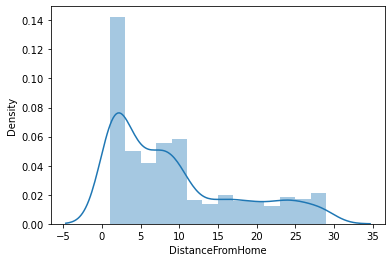

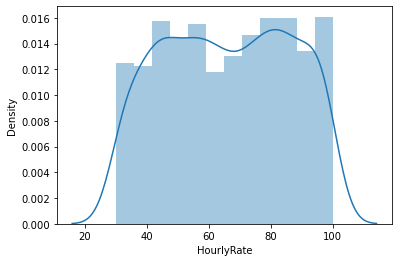

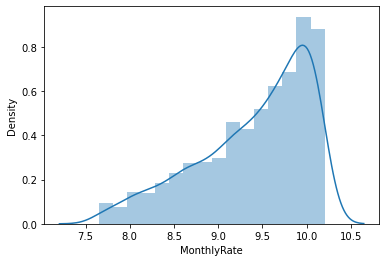

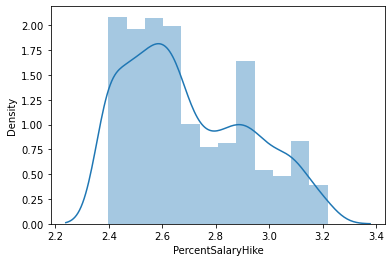

In [119]:
for val in quant_column:
    sns.distplot(qant_hr[val], kde=True)
    plt.show()

In [120]:
#import power_transform
from sklearn.preprocessing import power_transform

num_hr = power_transform(qant_hr)

num_hr = pd.DataFrame(num_hr, columns =qant_hr.columns)

In [121]:
num_hr

,DailyRate,MonthlyIncome,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike
0,0.765764,0.288339,-1.494085,1.354630,0.752409,-1.504661
1,-1.347765,0.056245,0.243416,-0.210675,1.383904,1.668761
2,1.322981,-1.451406,-1.031215,1.263094,-1.892849,0.209714
3,1.360430,-0.860363,-0.700347,-0.460197,1.186597,-1.504661
4,-0.442192,-0.563939,-1.031215,-1.289301,0.395986,-0.946495
...,...,...,...,...,...,...
1465,0.280477,-1.075868,1.407126,-1.235882,-0.191589,0.721580
1466,-0.384447,1.000357,-0.050827,-1.182703,0.989156,0.209714
1467,-1.770927,0.324303,-0.442291,1.032601,-1.333956,1.274549
1468,0.594196,0.130878,-1.031215,-0.111945,-0.057313,-0.110892


In [122]:
num_hr.skew()

DailyRate           -0.232648
MonthlyIncome        0.016520
DistanceFromHome    -0.007468
HourlyRate          -0.106461
MonthlyRate         -0.207515
PercentSalaryHike    0.091698
dtype: float64

- Skewness removed

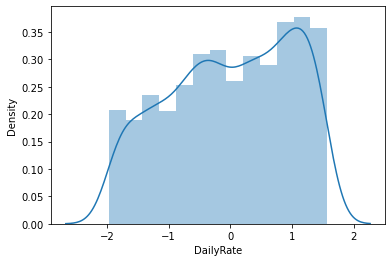

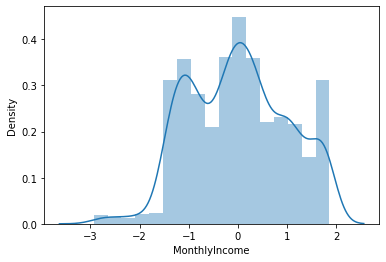

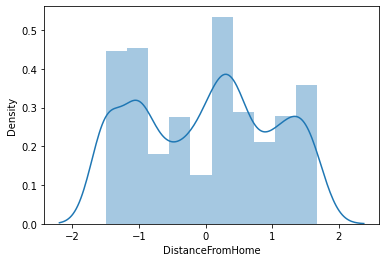

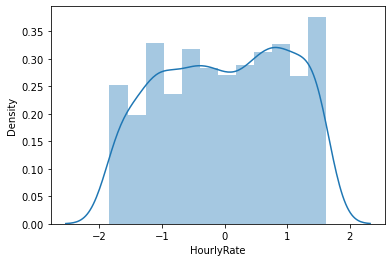

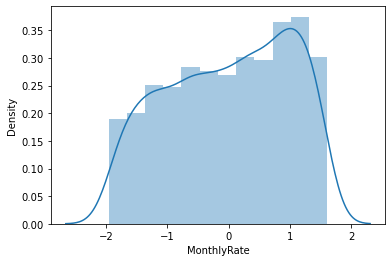

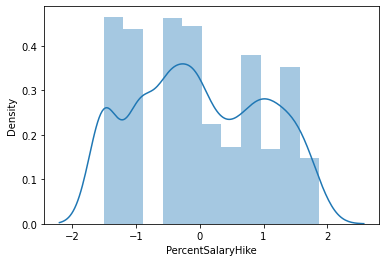

In [123]:
for val in quant_column:
    sns.distplot(num_hr[val], kde=True)
    plt.show()

In [124]:
for val in quant_column:
    new_hr = new_hr.drop(val, axis=1)

In [125]:
new_hr

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,2,2,3,2,4,8,3,1,0,...,4,0,5,1,2,1,0,7,2,1
1,49,1,3,2,2,2,1,4,4,1,...,7,1,7,0,1,1,1,6,1,0
2,37,2,4,2,1,3,6,3,2,0,...,0,0,0,1,1,4,1,2,2,1
3,33,4,4,3,1,3,1,3,3,0,...,7,3,0,0,1,1,0,6,1,1
4,27,1,1,3,1,2,9,3,4,1,...,2,2,2,0,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,3,4,2,4,4,3,3,1,...,2,0,3,0,1,3,1,2,1,0
1466,39,1,4,2,3,1,4,3,1,1,...,7,1,7,0,1,3,1,0,1,0
1467,27,3,2,4,2,2,1,4,2,1,...,2,0,3,0,1,1,1,4,1,1
1468,49,3,4,2,2,2,2,3,4,0,...,6,0,8,0,2,3,1,7,1,0


In [126]:
new_hr.columns

Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [127]:
final_hr = pd.concat([new_hr,num_hr], axis=1, join="inner")

In [128]:
final_hr.isnull().sum()

Age                         0
Education                   0
EnvironmentSatisfaction     0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
NumCompaniesWorked          0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
OverTime                    0
DailyRate                   0
MonthlyIncome               0
DistanceFromHome            0
HourlyRate                  0
MonthlyRate                 0
PercentSalaryHike           0
dtype: int64

In [129]:
final_hr.dtypes

Age                           int64
Education                     int64
EnvironmentSatisfaction       int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
NumCompaniesWorked            int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Attrition                     int32
Department                    int32
EducationField                int32
Gender                        int32
JobRole                       int32
MaritalStatus                 int32
OverTime                      int32
DailyRate                   float64
MonthlyIncome               float64
DistanceFromHome            float64
HourlyRate                  

- There are 30 columns all of numeric/quantitative

# checking for outlier and removal

In [131]:
# check for outliers 

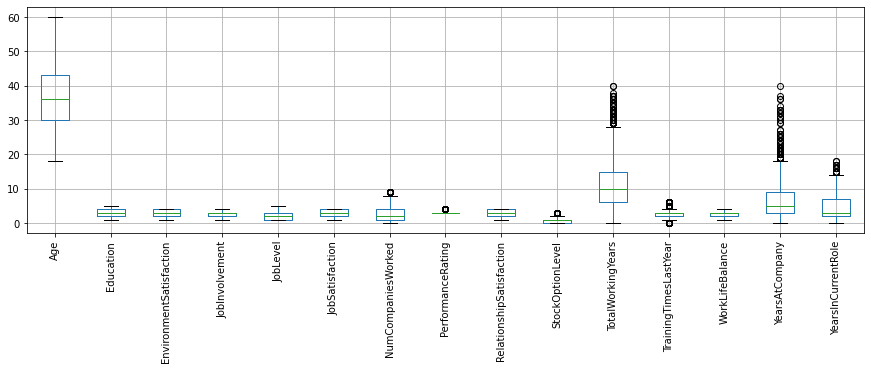

In [132]:
final_hr.iloc[:,0:15].boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

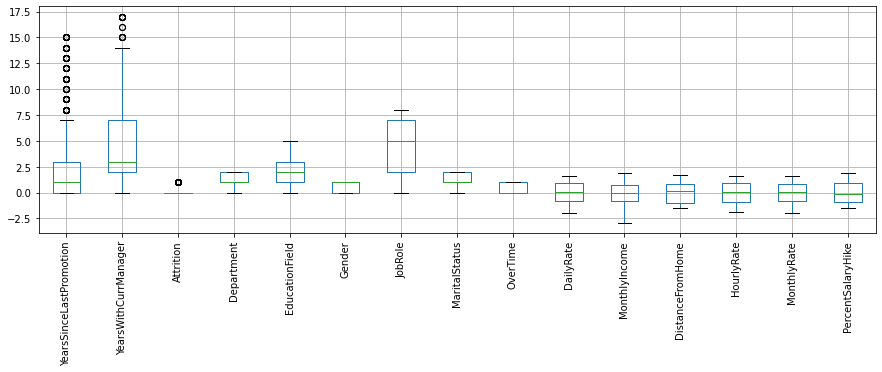

In [133]:
final_hr.iloc[:,15:].boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [134]:
#removing the outliers
from scipy.stats import zscore
z= np.abs(zscore(final_hr))


In [135]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([16, 15, 13, 15, 14, 15, 10, 10, 13, 15, 14, 15, 16, 10, 13, 15, 16,
       15, 10, 16, 13, 14, 15, 14, 16, 13, 15, 10, 13, 14, 15, 15, 16, 10,
       13, 13, 15, 15, 10, 14, 13, 13, 15, 13, 16, 15, 13, 10, 13, 15, 16,
       10, 16, 13, 15, 

In [136]:
final_hr = final_hr[(z<3).all(axis=1)]

In [137]:
final_hr.shape

(1387, 30)

#### Percentage data loss:

In [138]:
loss_percent = (1470-1387)/1470*100
print(loss_percent)

5.646258503401361


- The data loss percentage is under acceptable range 

# Splitting the independent and dependant variables

In [139]:

x = final_hr.drop("Attrition", axis =1)
y = final_hr["Attrition"]

In [140]:
print(x.shape)
print(y.shape)

(1387, 29)
(1387,)


In [141]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)
#scaled 

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.920863309352518  on Random State  431


# Split test/train split

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 431)

In [144]:
x_test.shape

(417, 29)

In [145]:
y_test.shape

(417,)

In [146]:
x_train.shape

(970, 29)

In [147]:
y_train.shape

(970,)

# Finding the best algorithm

##### for loop to get the best algorithm

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [152]:
model =[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [154]:
for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of " ,m, " is: ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

Accuracy score of  LogisticRegression()  is: 
0.920863309352518
[[360   7]
 [ 26  24]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       367
           1       0.77      0.48      0.59        50

    accuracy                           0.92       417
   macro avg       0.85      0.73      0.77       417
weighted avg       0.91      0.92      0.91       417



Accuracy score of  GaussianNB()  is: 
0.8009592326139089
[[302  65]
 [ 18  32]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       367
           1       0.33      0.64      0.44        50

    accuracy                           0.80       417
   macro avg       0.64      0.73      0.66       417
weighted avg       0.87      0.80      0.83       417



Accuracy score of  SVC()  is: 
0.9064748201438849
[[365   2]
 [ 37  13]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    

In [162]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [169]:
cross_list = [lr,gnb,svc,dt,rf]

from sklearn.model_selection import cross_val_score
for m in cross_list:
    scr = cross_val_score(m, x, y, cv = 10)
    print("the cross validation score of  model :", scr.mean())

the cross validation score of  model : 0.8738348451673443
the cross validation score of  model : 0.7865603169638202
the cross validation score of  model : 0.8572568032530498
the cross validation score of  model : 0.7801115629235742
the cross validation score of  model : 0.8521999791471171


### ObserLogestic  =92
#### Actual score
- Gnb = 80
- Svc = 91
- Dt = 78
- Rf = 89

#### Cross validation:
- Lr = 87
- Gnb = 78
- Svc = 85
- Dt = 79
- Rf = 85

#### Difference:
- Lr = 5
- Gnb = 2
- Svc = 6
- Dt = 1
- Rf = 4

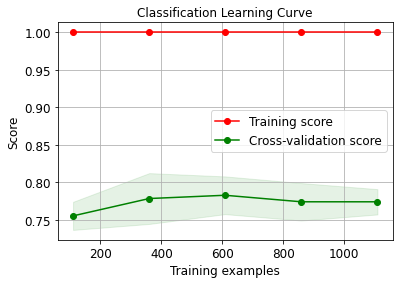

In [175]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

- Observation:
    - The best algorithm is decision tree clasifier with 79% accuracy

# Hyper Parameter tuning

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
#creating parameters list to pass in Grid SearchCV

parameters = {'max_depth': np.arange(2,15),
              "criterion": ["gini","entropy"]
    
}

In [178]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [195]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [196]:
GCV.best_params_
#printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 3}

In [197]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [198]:
accuracy_score(y_test, GCV_pred)

0.8729016786570744

### Observation:

- After Hyper parameter tuning the accuracy score is 87%

# Visuvalizatin of decision tree classifier

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [187]:
dt = DecisionTreeClassifier()

In [188]:
final_hr.columns

Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'DailyRate',
       'MonthlyIncome', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
       'PercentSalaryHike'],
      dtype='object')

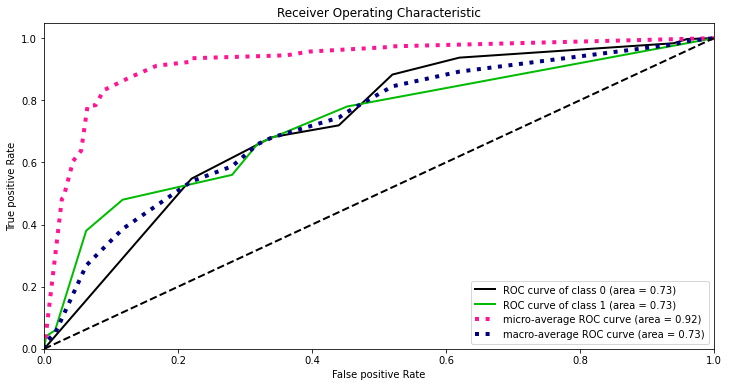

In [201]:
from sklearn.metrics import roc_curve, auc

test_prob = GCV.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

# Saving the model

In [191]:
import joblib
joblib.dump(GCV.best_estimator_, "HRattritionfinal.pkl")

['HRattritionfinal.pkl']

In [192]:
joblib.dump(GCV.best_estimator_, "HRattritionfinal.obj")

['HRattritionfinal.obj']

# Conculsion

In [193]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GCV_pred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
412,0,0
413,0,0
414,0,1
415,1,0
